## Import librairies

In [1]:
import dassflow2d as df2d
import numpy as np
import sys
import os
import h5py

## Define basic parameters

In [2]:
run_type = "direct"
# runtype :
# - rundirect runmin, 
# - classic treatment, 
# - if runtype = runminpython 
dassflow_dir="/home/livillenave/Documents/distant/dassflow2d-wrap"

## run main2

### model setup

In [3]:
if run_type == "min" or run_type == "direct":

    # initialise fortran instance, and python corrponding data
    my_model = df2d.dassflowmodel(
            dassflow_dir = dassflow_dir,
            bin_dir = f"{dassflow_dir}/code/bin_A", 
            run_type = run_type,
            clean= True)
            
    # then intialise meshing
    my_model.init_mesh()
    # initialise dof structure
    my_model.init_dof() 
    # initialise remaining structures
    my_model.init_fortran()
    
    my_model.param =df2d.core.param.Param()    
    my_model.param.get()
        # update manning values and patches
    #my_model.param.friction.manning["patch_value"] = np.array([0.33,0.5])
    #my_model.param.friction.manning["patch_correspondance"] = np.array([1,2])
    # addapt my_model.param.friction.manning["mesh_correspondance"] 
        # done
    my_model.param.set()

clean= True


### check inputs

#### Config

In [4]:
from pprint import pprint; pprint(my_model.config)

{'adapt_dt': 1,
 'c_bathy': 0,
 'c_hydrograph': 1,
 'c_ic': 0,
 'c_manning': 0,
 'c_manning_beta': 0,
 'c_rain': 0,
 'c_ratcurve': 0,
 'cfl': 0.8,
 'coef_feedback': 0.1,
 'dt': 5.0,
 'dta': 0,
 'dtp': 60.0,
 'dtw': 3600.0,
 'eps_min': 0,
 'feedback_inflow': 1,
 'friction': 1,
 'g': 10.0,
 'heps': 0,
 'max_nt_for_adjoint': 2500,
 'mesh_name': 'channel.geo',
 'restart_min': 0,
 'spatial_scheme': 'first_b1',
 'temp_scheme': 'euler',
 'ts': 14400.0,
 'use_obs': 1,
 'w_gnuplot': 1,
 'w_obs': 1,
 'w_tecplot': 1,
 'w_vtk': 1}


#### Meshing

/home/livillenave/.local/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


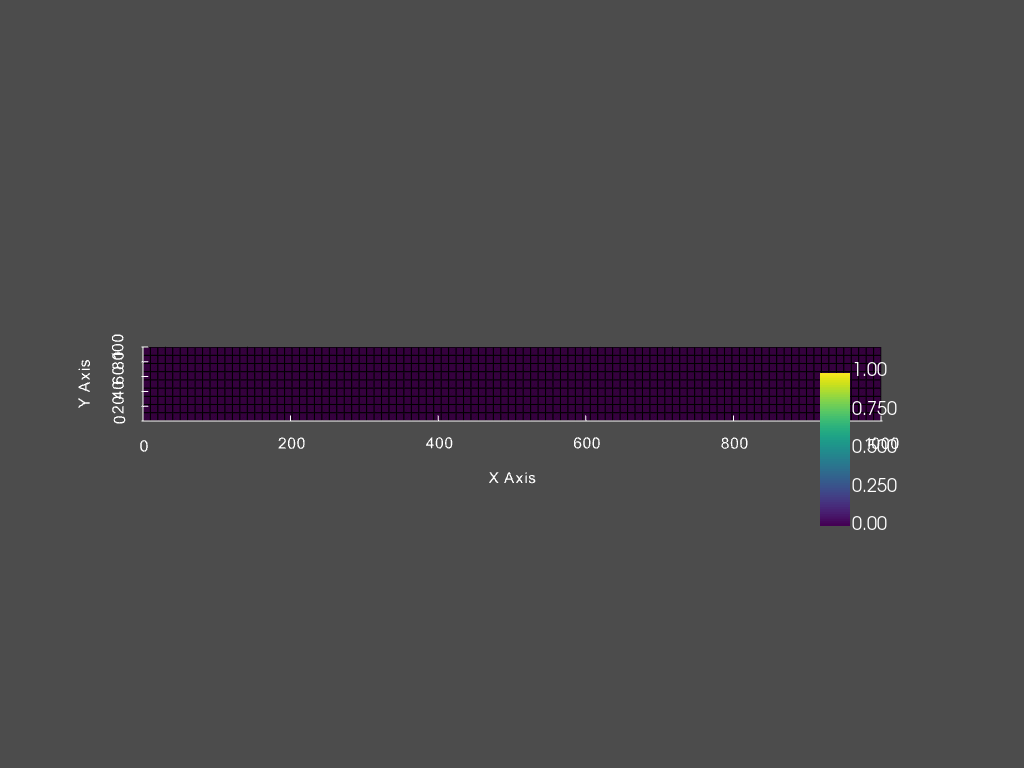

In [5]:
my_model.meshing.plot()

In [6]:
%%capture
my_model.meshing.plot_dev(what = "cell")
my_model.meshing.plot_dev(what = "node")
my_model.meshing.plot_dev(what = "edge")

#### Boundaries

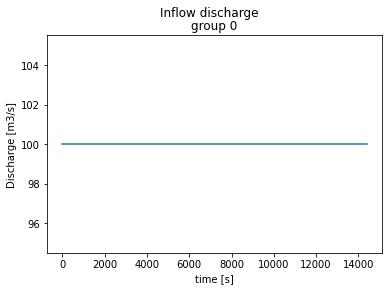

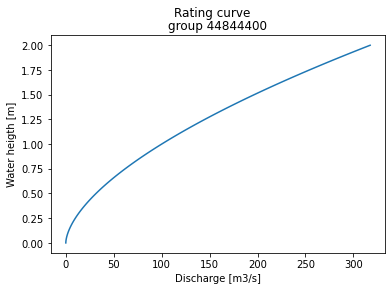

In [7]:
my_model.boundary.plot(what = "meshing")
my_model.boundary.plot(what = "values")

### parameters

#### Bathymetry

/home/livillenave/.local/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


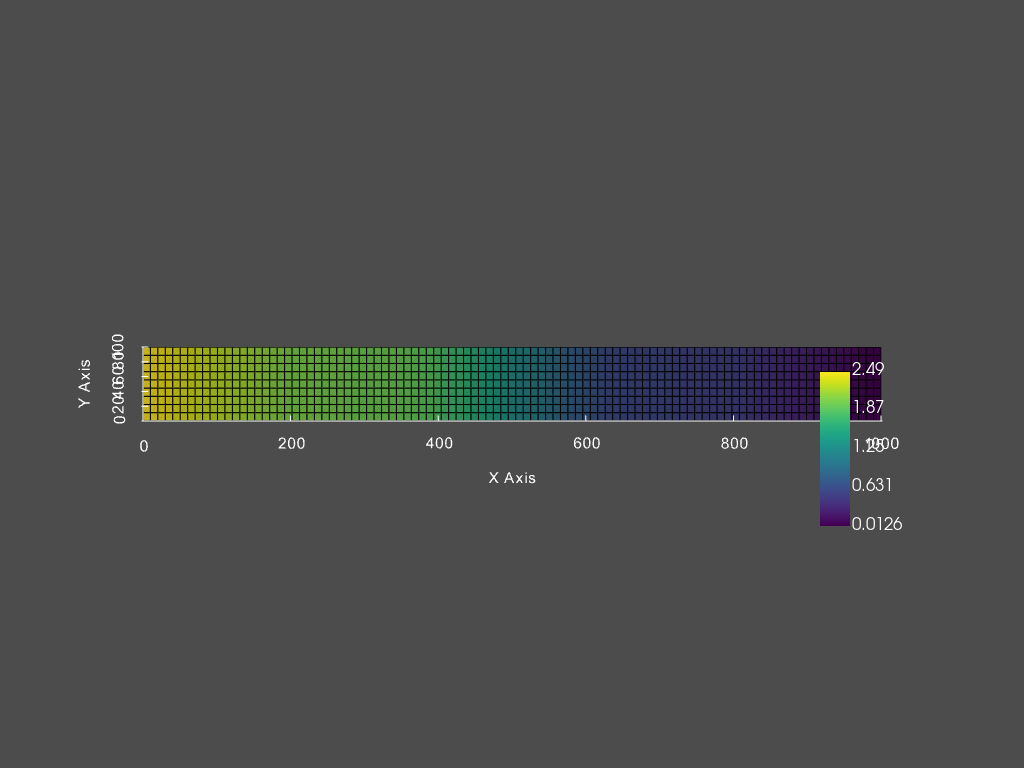

In [8]:
bathy_cell = df2d.wrapping.m_model.get_array_bathy_cell()
bathy_cell = bathy_cell[:my_model.meshing.mesh_fortran.nc] #remove ghost cells
my_model.meshing.plot(my_scalar =bathy_cell )

#### friction 

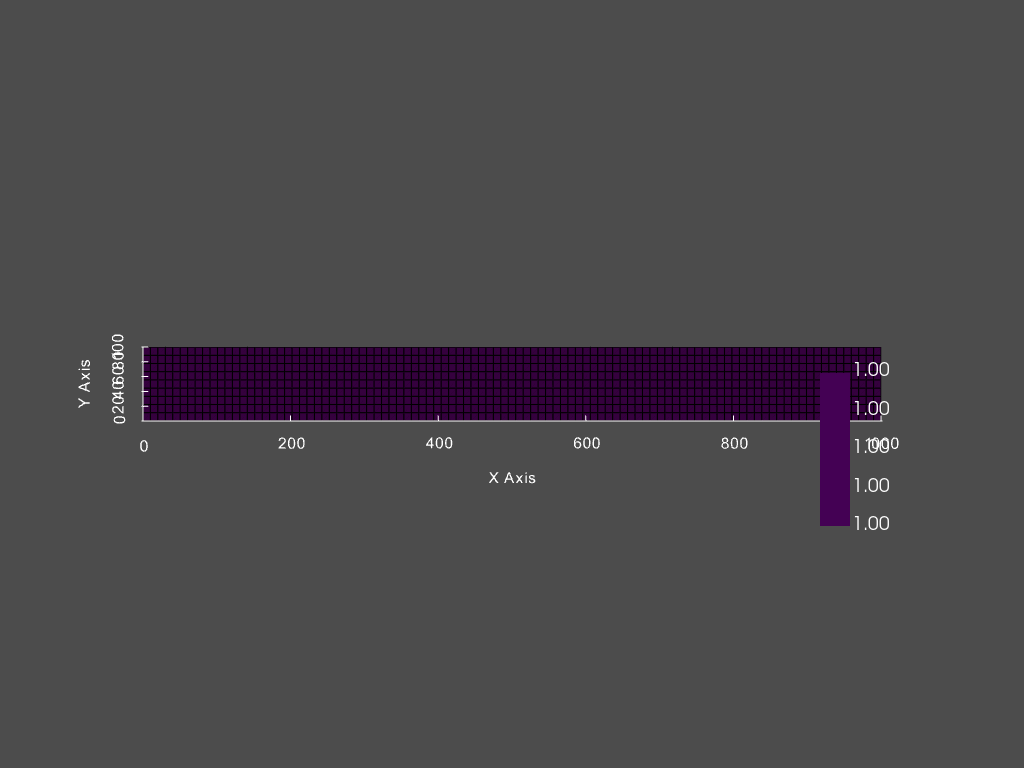

patch correspondance
[1]
patch value
[0.05]


In [9]:
# patch correspondance on mesh
my_model.meshing.plot(my_scalar = my_model.param.friction.manning["mesh_correspondance"])

# tables of value
print("patch correspondance")
print(my_model.param.friction.manning["patch_correspondance"])
print("patch value")
print(my_model.param.friction.manning["patch_value"])

### Initial conditions

#### water height (h)

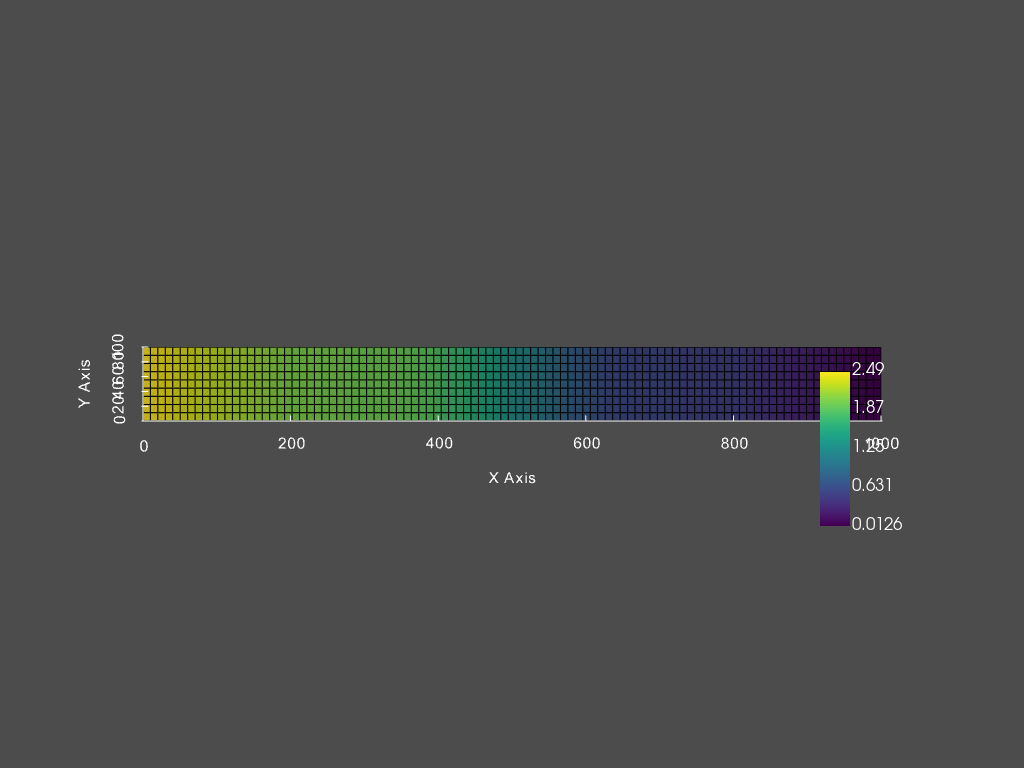

In [10]:
h = my_model.kernel.dof0.h
h = bathy_cell[:my_model.meshing.mesh_fortran.nc] #remove ghost cells
my_model.meshing.plot(my_scalar =h )

#### x velocity (u)

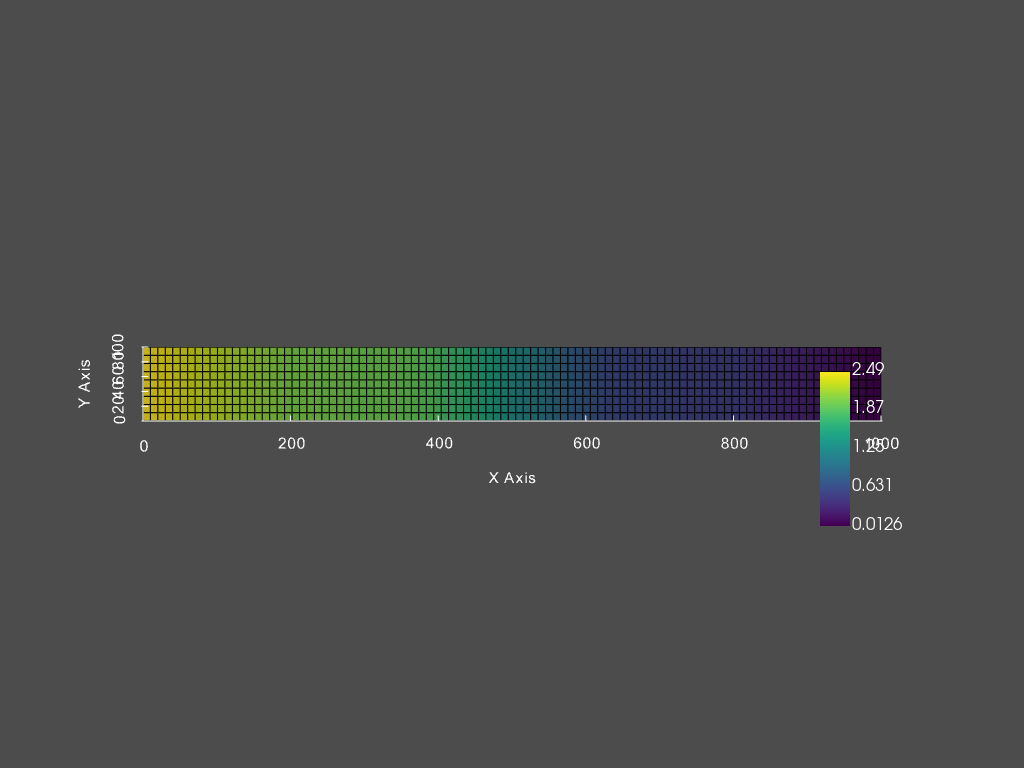

In [11]:
u = my_model.kernel.dof0.u
u = bathy_cell[:my_model.meshing.mesh_fortran.nc] #remove ghost cells
my_model.meshing.plot(my_scalar =u )

#### y velocity (v)

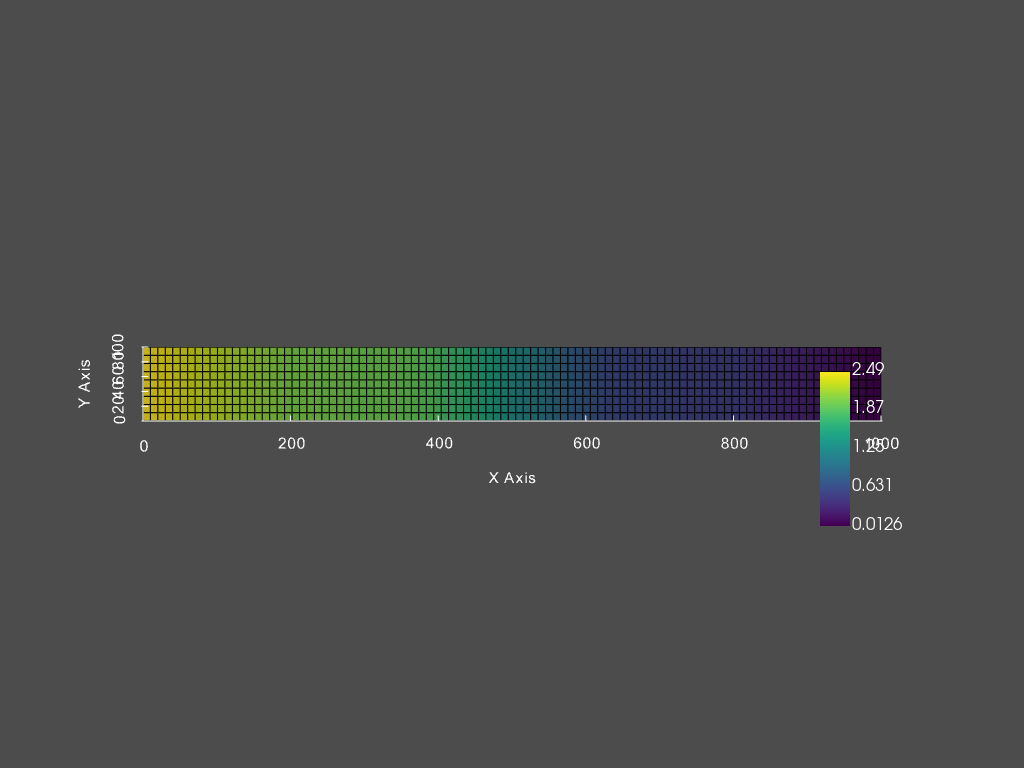

In [12]:
v = my_model.kernel.dof0.v
v = bathy_cell[:my_model.meshing.mesh_fortran.nc] #remove ghost cells
my_model.meshing.plot(my_scalar =v )

### model run

In [13]:
my_model.run()

>>> Outputs initialized 
 - Simulation Result files were loaded from : /home/livillenave/Documents/distant/dassflow2d-wrap/code/bin_A/res/ 


### Save results

In [14]:
hdf5_path = f"{my_model.bin_dir}/res/simu.hdf5"
my_model.outputs.save_res(hdf5_path)
my_model.config.save(hdf5_path)
my_model.meshing.save(fmt = "hdf5", hdf5_path =hdf5_path)
my_model.boundary.save(hdf5_path =hdf5_path)
my_model.param.save(hdf5_path =hdf5_path)